In [1]:
from minidiff.nn import MLP
model = MLP([2, 2, 1])
model.__repr__()

'MLP: ([2, 2, 1])'

In [188]:
import torch
# input logits and target.
loss = torch.nn.CrossEntropyLoss()
# pred = torch.tensor([0.6, 0.2]).view(1, 2).type(torch.float32)
pred = torch.tensor([[0.6, 0.4], [0.8, 0.2]]).view(2, 2).type(torch.float32)
true = torch.tensor([0, 1]).view(2, ).type(torch.long)

loss(pred, true)

tensor(0.8178)

In [189]:
# between the target and the input probabilitiesloss
loss = torch.nn.BCELoss()
pred = torch.tensor([0.6, 0.2]).type(torch.float32)
pred = torch.nn.functional.sigmoid(pred)
print(pred)
true = torch.tensor([0, 1]).type(torch.float32)
loss(pred, true)

tensor([0.6457, 0.5498])


tensor(0.8178)

In [190]:
a = set()
a.add(1)
a.add(3)
a

{1, 3}

In [191]:
from minidiff.autodiff import Value


def pgrad(x):
    for i in x:
        print(i.grad)

def loss(x):
    return x * 3

a = Value(2)
b = Value(3)
c = a * b
c = c * 5
c = loss(c)
c
# c.backward()
# pgrad([a, b, c])




Data: 90

In [192]:
c.data

90

In [1]:
from minidiff.nn import MLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
import warnings
sns.set_theme(style="darkgrid")

warnings.filterwarnings("ignore")



## Dataset

In [2]:
n = MLP([3, 4, 4, 1])
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -2.0]
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
ypred

[Data: -0.6190741671114071,
 Data: -0.897012713001394,
 Data: -0.3860022934139105,
 Data: -0.8724725425473013]

In [3]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

In [4]:
loss

Data: 6.515154146177363

In [5]:
loss.backward()

In [14]:
n.mlp[0].layer[0].w[0].grad, n.mlp[1].layer[0].w[0].grad

(0.0, 0.0)

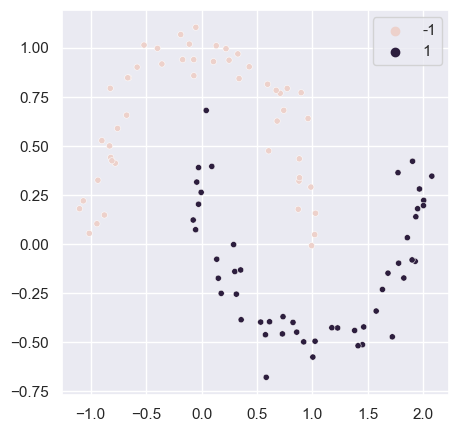

In [201]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.1)

def plot(x, y):
    sns.scatterplot(x=x[:, 0],
                    y=x[:, 1],
                    hue=y,
                    s=20,
                    cmap="jet")
    
y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
# plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plot(x, y)

In [217]:
model = MLP(layers=[2, 3, 3, 1])
logits = model(x[0])
print(logits)
model.update_params()


[Data: -0.3740225752793142]


In [203]:
    
def train(model, x, y, lr=1e-2, iterations=10):
    total_loss = []
    x, y = x.tolist(), y.tolist()
    for i in range(iterations):

        logits = list(map(model, x))
        model.zero_grad()

        # using MSE loss
        loss = [(pred[0] - true)**2 for pred, true in zip(logits, y)]

        # loss -> [Value(...), ...] it is a list of Value objects. Which is the final loss

        # backward
        for l in loss:
            l.backward()

        loss = sum(loss)
        total_loss.append(loss.data)


        # update weights
        model.update_params(lr=lr)
    return total_loss

model = MLP(layers=[2, 4, 4, 2, 1])
loss = train(model=model,
      x=x,
      y=y,
      iterations=500,
      lr=1e-2)

plt.plot(range(len(loss)), loss, '.');
    


OverflowError: math range error

In [206]:
def plot_decision_boundary(model, x, y, h=0.25, threshold=0.0):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Xmesh = np.c_[xx.ravel(), yy.ravel()]
    inputs = list(map(Value, xrow) for xrow in Xmesh)
    scores = list(map(model, inputs))
    Z = np.array([s[0].data >= threshold for s in scores])
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plot(x, y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plot_decision_boundary(model=model,
                       x=x,
                       y=y,
                       threshold=0)

OverflowError: math range error